# Section 3: Data Exploration & Visualization - Notes

#### Section notes by Jakob Heinz(2024), Guanlan Dong (2022), Artur Rego-Costa (2021), Luis Gutierrez (2020) and Mary Richardson (2019)

* [Pandas](#Pandas)
    * [Read data from a file](#Read-data-from-a-file)
    * [Create a DataFrame](#Create-a-DataFrame)
    * [Explore the data](#Explore-the-data)
        * [Accessing values](#Accessing-values)
        * [Finding minima and maxima](#Finding-minima-and-maxima)
        * [Sorting](#Sorting)
        * [Merging](#Merging)
    * [Modify the data](#Modify-the-data)
        * [Create new columns](#Create-new-columns)
        * [Change values](#Change-values)
    * [Tidy the data](#Tidy-the-data)
        * [Identifying and removing missing data](#Identifying-and-removing-missing-data)
        * [Melting](#Melting)
    * [Write data to a file](#Write-data-to-a-file)
* [Matplotlib and Seaborn](#Matplotlib-and-Seaborn)

In the first PSet we saw how to import and manipulate data using Python built-in functions, which is a very useful skill to have in our toolbox when dealing with the variety of formats in which data can come. However, most of the data we come across is in table format. This type of data can be easily handled by special classes and methods included in well-maintained libraries, helping us make our code more robust, reproducible, readable, and efficient.

This week we are going to learn how to use the ```Pandas``` library to handle data, as well as how to visualize data using some basic plot functions.

Keep this document as a quick reference for you to use as you get more familiar with these tools, but we also strongly encourage you to read the documentation to expand your understanding of functionalities implemented in these libraries. Pay close attention to the parameters used in functions: some need to be included for a function to successfully run, while others will take default values if left unspecified.

We start by importing the necessary libraries:

In [5]:
import numpy as np                # So we can do useful things with arrays
import pandas as pd               # So we can store our *tidy* data
import matplotlib.pyplot as plt   # So we can plot all the things
import seaborn as sns             # So we can make even prettier plots of all the things

# So that matplotlib plots are shown in the Jupyter notebook
%matplotlib inline

# Pandas

**Pandas (Python Data Analysis Library)** is a data analysis library that makes it easy to store data in a nice, tidy format. It plays particularly well with jupyter notebooks, since it makes your data easy to read too! We'll focus on a Pandas data structure called a **DataFrame**, which is a 2D table with labeled rows and columns.

It is very easy to load a table using Pandas. We will start by loading in vegetable prices from 2022. This data comes from the US Department of agriculture and can be downloaded [here](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/#Archived%20Fruit%20and%20Vegetable%20Prices%20Tables). There's also data on fruit prices if you'd like to investigate those! 

### Read data from a file


In [6]:
!head veggie_prices_2022.csv

#Vegetable,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice
Acorn squash,Fresh,1.2136,per pound,0.4586,0.4519,pounds,1.1961
Artichoke,Fresh,2.4703,per pound,0.375,0.3858,pounds,2.5415
Artichoke,Canned,3.4498,per pound,0.65,0.3858,pounds,2.0476
Asparagus,Fresh,2.9531,per pound,0.4938,0.3968,pounds,2.3731
Asparagus,Canned,3.4328,per pound,0.65,0.3968,pounds,2.0958
Asparagus,Frozen,6.8212,per pound,1.0335,0.3968,pounds,2.6191
Avocados,Fresh,2.6737,per pound,0.7408,0.3197,pounds,1.1538
Beets,Canned,1.1431,per pound,0.65,0.3748,pounds,0.6591
Black beans,Canned,1.2387,per pound,0.65,0.3858,pounds,0.7352


According to this table structure, we can load it into a DataFrame using the function `pd.read_table()` as follows:

In general, when we call the function `pd.read_table()`, we can specify the following parameters:
- `header=None` if there is no header
- `header=n` if the column names are in line `n` (remember we're counting the lines starting at 0)
- `names=['col1','col2']` if we need to input our own column names (for example if we set `header=None`)
- `index_col=n` if the row names are in column `n`
- `comment='#'` if we need to ignore all lines starting with a certain character
- `skiprows=n` if we need to ignore the first `n` rows
- `delimiter=','` to import a CSV file.

There are many other possible options. Try looking through the `pandas.read_table()` [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_table.html). Test out some of the other parameters we haven't tried here (I've barely scratched the surface with these examples!) There are lots of cool things you can do with this function to customize how you read in a file, and you might find some of them useful on this week's PSet and beyond.

In [7]:
#we can enter all the column names manually,
#but i'm lazy so this extracts them from the file and we pass them in below
cols = !head -n1 veggie_prices_2022.csv 
cols = cols[0].strip('#').split(',')

df_veg = pd.read_table('Veggie_prices_2022.csv', # File path
                            sep=',', # Whether it is whitespace delimited
                            skiprows=1, # Number of rows to skip
                            header = None, # Row that has the header (None since we are going to provide it ourselves)
                            names = cols, # Column names
                            index_col=0 # Set the row names using the first column
                           )
df_veg

,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice
Vegetable,,,,,,,
Acorn squash,Fresh,1.2136,per pound,0.4586,0.4519,pounds,1.1961
Artichoke,Fresh,2.4703,per pound,0.3750,0.3858,pounds,2.5415
Artichoke,Canned,3.4498,per pound,0.6500,0.3858,pounds,2.0476
Asparagus,Fresh,2.9531,per pound,0.4938,0.3968,pounds,2.3731
Asparagus,Canned,3.4328,per pound,0.6500,0.3968,pounds,2.0958
...,...,...,...,...,...,...,...
Tomatoes,Canned,1.0715,per pound,1.0000,0.5401,pounds,0.5787
Turnip greens,Fresh,2.9250,per pound,0.7500,0.3197,pounds,1.2467
Turnip greens,Canned,1.3154,per pound,0.6500,0.3527,pounds,0.7138


In [8]:
#we explain this below, but we can see that the values in the RetailPriceUnit and CupEquivalentUnit 
#are all the same, so for simplicity, we will remove them from the df

print(np.unique(list(df_veg['RetailPriceUnit'])))
print(np.unique(list(df_veg['CupEquivalentUnit'])))

df_veg = df_veg.drop(['RetailPriceUnit','CupEquivalentUnit'], axis = 1)
df_veg

['per pound']
['pounds']


,Form,RetailPrice,Yield,CupEquivalentSize,CupEquivalentPrice
Vegetable,,,,,
Acorn squash,Fresh,1.2136,0.4586,0.4519,1.1961
Artichoke,Fresh,2.4703,0.3750,0.3858,2.5415
Artichoke,Canned,3.4498,0.6500,0.3858,2.0476
Asparagus,Fresh,2.9531,0.4938,0.3968,2.3731
Asparagus,Canned,3.4328,0.6500,0.3968,2.0958
...,...,...,...,...,...
Tomatoes,Canned,1.0715,1.0000,0.5401,0.5787
Turnip greens,Fresh,2.9250,0.7500,0.3197,1.2467
Turnip greens,Canned,1.3154,0.6500,0.3527,0.7138


Now we have a nice simple dataframe to begin learning about pandas! 

Let's also read in a file about how many of each vegetable I've been eating over the years

In [9]:
cols = !head -n1 jakobs_veggie_consumption.tsv
cols = cols[0].strip('#').split('\t')

df_jakob = pd.read_table('jakobs_veggie_consumption.tsv', # File path
                            sep='\t', # Whether it is whitespace delimited
                            comment='#', # Number of rows to skip
                            header = None, # Row that has the header (None since we are going to provide it ourselves)
                            names = cols, # Column names
                            index_col=0 # Set the row names using the first column
                           )
df_jakob

,4y,8y,12y,16y,20y,24y
Vegetable,,,,,,
Acorn squash,755,26,28,72,39,75
Artichoke,14,87,525,54,56,31
Avocados,51,968,55,29,10,838
Beets,45,23,827,890,69,90
Black beans,965,25,47,49,74,83
...,...,...,...,...,...,...
"Tomatoes, grape & cherry",507,76,552,40,32,24
"Tomatoes, large round",825,58,35,85,95,26
"Tomatoes, roma & plum",30,63,692,68,38,53


### Create a DataFrame

Although probably for most of our applications we will create a DataFrame by importing a file using `pd.read_table()`. We can also create a DataFrame from data stored in a list of lists, a 2D numpy array, or a dictionary.

In [10]:
# Create a pandas dataframe from a list of lists
D   =  [[ 12.0, 16.0,  4.0, 8.0  ],
        [  7.0, 21.0, 14.0, 28.0 ],
        [  5.0, 25.0, 20.0, 10.0 ]]
df  = pd.DataFrame(D)
df

,0,1,2,3
0,12.0,16.0,4.0,8.0
1,7.0,21.0,14.0,28.0
2,5.0,25.0,20.0,10.0


Each list within nested list ```D``` becomes a **row** in ```df```.

In [11]:
# Create a pandas dataframe from a 2D numpy array
D   =  np.array(
       [[ 12.0, 16.0,  4.0, 8.0  ],
        [  7.0, 21.0, 14.0, 28.0 ],
        [  5.0, 25.0, 20.0, 10.0 ]])
df  = pd.DataFrame(D, index=['tamarind','caraway','kohlrabi'], # Set row names
                   columns=['sample1', 'sample2', 'sample3', 'sample4']) # Set column names
df

,sample1,sample2,sample3,sample4
tamarind,12.0,16.0,4.0,8.0
caraway,7.0,21.0,14.0,28.0
kohlrabi,5.0,25.0,20.0,10.0


Each 1D array within the 2D array ```D``` becomes a **row** in ```df```.

In [12]:
# Create a pandas dataframe from a dictionary
D = { 'tamarind': [ 12.0, 16.0,  4.0, 8.0 ],
      'caraway':  [  7.0, 21.0, 14.0, 28.0],  
      'kohlrabi': [  5.0, 25.0, 20.0, 10.0] } # Automatically sets column names
df = pd.DataFrame(D, index=['sample1', 'sample2', 'sample3', 'sample4']) # Set row names
df

,tamarind,caraway,kohlrabi
sample1,12.0,7.0,5.0
sample2,16.0,21.0,25.0
sample3,4.0,14.0,20.0
sample4,8.0,28.0,10.0


Each element in dictionary ```D``` becomes a **column** in ```df```.

### Explore the data

Now we'll learn how to access different slices of our data, as well as get acquainted with some of the methods implemented for the `pandas.DataFrame` class that can help us understand the data at hand. Check the [left-side menu bar in the documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) for a complete list of available methods.

#### Accessing values

1. We can observe the first or last $n$ lines of a dataframe using methods `df.head()` and `df.tail()`:

In [13]:
df_veg.head(n = 3) # n defaults to 5 if not specified

,Form,RetailPrice,Yield,CupEquivalentSize,CupEquivalentPrice
Vegetable,,,,,
Acorn squash,Fresh,1.2136,0.4586,0.4519,1.1961
Artichoke,Fresh,2.4703,0.3750,0.3858,2.5415
Artichoke,Canned,3.4498,0.6500,0.3858,2.0476


In [14]:
df_veg.tail(n = 4) # n defaults to 5 if not specified

,Form,RetailPrice,Yield,CupEquivalentSize,CupEquivalentPrice
Vegetable,,,,,
Turnip greens,Fresh,2.9250,0.7500,0.3197,1.2467
Turnip greens,Canned,1.3154,0.6500,0.3527,0.7138
Turnip greens,Frozen,2.5169,0.7760,0.3527,1.1440
Zucchini,Fresh,1.6359,0.7695,0.3968,0.8437


We can take a sample of $n$ lines of a dataframe using methods `df.sample()`:

In [15]:
df_veg.sample(n=4) 

,Form,RetailPrice,Yield,CupEquivalentSize,CupEquivalentPrice
Vegetable,,,,,
Broccoli heads,Fresh,3.0820,0.7800,0.3417,1.3502
Potatoes,Fresh,0.8166,0.8113,0.2646,0.2663
Turnip greens,Frozen,2.5169,0.7760,0.3527,1.1440
Navy beans,Canned,1.2738,0.6500,0.3858,0.7561


2. We can access **columns** based on their names using the `[]` operator using a single column name, or a list of column names:

In [16]:
# access column using a single column name
df_veg['RetailPrice']

Vegetable
Acorn squash     1.2136
Artichoke        2.4703
Artichoke        3.4498
Asparagus        2.9531
Asparagus        3.4328
                  ...  
Tomatoes         1.0715
Turnip greens    2.9250
Turnip greens    1.3154
Turnip greens    2.5169
Zucchini         1.6359
Name: RetailPrice, Length: 93, dtype: float64

In [17]:
# access column using a list of column names
df_veg[['RetailPrice', 'CupEquivalentPrice']]

,RetailPrice,CupEquivalentPrice
Vegetable,,
Acorn squash,1.2136,1.1961
Artichoke,2.4703,2.5415
Artichoke,3.4498,2.0476
Asparagus,2.9531,2.3731
Asparagus,3.4328,2.0958
...,...,...
Tomatoes,1.0715,0.5787
Turnip greens,2.9250,1.2467
Turnip greens,1.3154,0.7138


Notice that accessing a single column, as in `df_veg['0h']`, returns not a dataframe, but a *Series*, which are 1D data structures similar to lists. We will not go into detail on the topic of Series, but feel free to explore [its documentation](https://pandas.pydata.org/docs/reference/series.html).

In [18]:
# Identify the data type of a dataframe column
type(df_veg['RetailPrice'])

pandas.core.series.Series

In [19]:
#we can cast the values to a list which may be useful sometimes
x = list(df_veg['RetailPrice'])
type(x)

list

3. We can access **rows** in a similar way, based on a single index (row name), a list of indexes, or even range of indexes (with `:` operator), by using the `[]` operator on `df.loc`:

In [20]:
# access row with single index
df_veg.loc['Turnip greens'] # Returns a series object

,Form,RetailPrice,Yield,CupEquivalentSize,CupEquivalentPrice
Vegetable,,,,,
Turnip greens,Fresh,2.9250,0.750,0.3197,1.2467
Turnip greens,Canned,1.3154,0.650,0.3527,0.7138
Turnip greens,Frozen,2.5169,0.776,0.3527,1.1440


In [72]:
# access row with a list of indexes
df_veg.loc[['Carrots', 'Asparagus']] # Returns a dataframe

,Form,RetailPrice,Yield,CupEquivalentSize,CupEquivalentPrice
Vegetable,,,,,
Carrots,Canned,1.1979,0.6500,0.3197,0.5892
Carrots,Frozen,1.7277,0.9800,0.3197,0.5636
Asparagus,Fresh,2.9531,0.4938,0.3968,2.3731
Asparagus,Canned,3.4328,0.6500,0.3968,2.0958
Asparagus,Frozen,6.8212,1.0335,0.3968,2.6191


In [21]:
# access row with range of indexes (INCLUDES upper limit)
df_veg.loc['Broccoli':'Carrots'] # Returns a dataframe  

,Form,RetailPrice,Yield,CupEquivalentSize,CupEquivalentPrice
Vegetable,,,,,
Broccoli,Frozen,2.3458,0.8818,0.3417,0.9090
Brussels sprouts,Fresh,2.9139,1.0600,0.3417,0.9394
Brussels sprouts,Frozen,2.5949,0.9600,0.3417,0.9237
Butternut squash,Fresh,1.2691,0.7140,0.4519,0.8033
"Cabbage, green",Fresh,0.7970,0.7788,0.3307,0.3384
"Cabbage, red",Fresh,1.2604,0.7791,0.3307,0.5350
"Cabbage, sauerkraut",Canned,1.4780,0.6500,0.3086,0.7018
"Carrots, cooked whole",Fresh,0.9761,0.8158,0.3197,0.3825
"Carrots, raw whole",Fresh,0.9761,0.8900,0.2756,0.3022


Notice that this is the reason why setting indexes (row names) is useful: you can access relevant rows with strings, akin to using keys to access data in a dictionary.

4. Rows can also be accessed using integer indexes or slice objects, using the `[]` operator on `df.iloc`:

In [22]:
# access row with integer index
df_veg.iloc[2] # Returns a series object

Form                  Canned
RetailPrice           3.4498
Yield                   0.65
CupEquivalentSize     0.3858
CupEquivalentPrice    2.0476
Name: Artichoke, dtype: object

In [23]:
# access row with slice object (EXCLUDES upper limit, as usual)
df_veg.iloc[2:5] # Returns a dataframe

,Form,RetailPrice,Yield,CupEquivalentSize,CupEquivalentPrice
Vegetable,,,,,
Artichoke,Canned,3.4498,0.6500,0.3858,2.0476
Asparagus,Fresh,2.9531,0.4938,0.3968,2.3731
Asparagus,Canned,3.4328,0.6500,0.3968,2.0958


5. Finally, the .loc method can also access rows based on Boolean (logical) lists or series, which is the most useful when using logical operations to subset the data:

In [24]:
# logical operation produces Boolean series as long as data itself
bool_series = df_veg['RetailPrice'] > 3
print('Boolean series has ' + str(sum(bool_series)) + ' True items:')
bool_series

Boolean series has 15 True items:


Vegetable
Acorn squash     False
Artichoke        False
Artichoke         True
Asparagus        False
Asparagus         True
                 ...  
Tomatoes         False
Turnip greens    False
Turnip greens    False
Turnip greens    False
Zucchini         False
Name: RetailPrice, Length: 93, dtype: bool

In [25]:
# boolean series can then be used to subset relevant rows
df_veg.loc[bool_series]

,Form,RetailPrice,Yield,CupEquivalentSize,CupEquivalentPrice
Vegetable,,,,,
Artichoke,Canned,3.4498,0.6500,0.3858,2.0476
Asparagus,Canned,3.4328,0.6500,0.3968,2.0958
Asparagus,Frozen,6.8212,1.0335,0.3968,2.6191
Broccoli heads,Fresh,3.0820,0.7800,0.3417,1.3502
Cauliflower florets,Fresh,3.8022,0.9702,0.2756,1.0800
Collard greens,Fresh,3.0881,1.1600,0.2866,0.7630
Kale,Fresh,3.4338,1.0500,0.2866,0.9373
"Lettuce, romaine, hearts",Fresh,3.2802,0.8500,0.2094,0.8082
"Mushrooms, whole",Fresh,3.8929,0.9700,0.1543,0.6194


6. row and columns can be defined in a single operation using different forms, of which we illustrate a few in here:

In [26]:
# Example 1: df['col_name']['row_name']
df_veg['RetailPrice']['Olives'] # df_veg['RetailPrice']['Olives'] will return an error

np.float64(5.3496)

In [27]:
# Example 2: df['col_name']['row_index_or_slice_object']
df_veg['RetailPrice'][10:13]

Vegetable
Blackeye peas       1.3164
Blackeye peas       1.9265
Broccoli florets    2.9162
Name: RetailPrice, dtype: float64

In [28]:
# Example 3: df.loc['row_name', 'col_name']
df_veg.loc['Olives', 'RetailPrice']

np.float64(5.3496)

In [29]:
# Example 4: df.iloc['row_index_or_slice_object']['col_name']
df_veg.iloc[10:15]['RetailPrice']

Vegetable
Blackeye peas       1.3164
Blackeye peas       1.9265
Broccoli florets    2.9162
Broccoli heads      3.0820
Broccoli            2.3458
Name: RetailPrice, dtype: float64

In [30]:
# Example 5 (for a single value): df.at['row_name', 'col_name']
df_veg.at['Olives', 'RetailPrice']

np.float64(5.3496)

In [31]:
# Example 6 (for a single value): df.iat['row_index', 'col_index']
df_veg.iat[10, 1]

np.float64(1.3164)

#### Finding minima and maxima

1. We can find the maximum value in a column using the `.max` method:

In [32]:
df_jakob['20y'].max()

np.int64(979)

2. But in order to find the row in which we find this maximum value we have two methods:

In [33]:
# Option 1: find max using Boolean operation
bool_max = df_jakob['20y']==df_jakob['20y'].max() # Create Boolean series
df_jakob.loc[bool_max] # Find rows that correspond to maximum value

,4y,8y,12y,16y,20y,24y
Vegetable,,,,,,
Great northern beans,52,29,690,25,979,49


In [113]:
# Option 2: find index (row name) corresponding to max using .idxmax method
rowid = df_jakob['20y'].idxmax() # Find index of max halflife
print('The row corresponding to max vegetable consumed has index: ' + rowid)
df_jakob.loc[rowid]

The row corresponding to max vegetable consumed has index: Great northern beans


4y      52
8y      29
12y    690
16y     25
20y    979
24y     49
Name: Great northern beans, dtype: int64

3. For finding the minimum, the same methods can be used simply by substituting `min` for `max`:

In [119]:
print("The least amount of vegetable eaten during Jakob's 20s: " + str(df_jakob['20y'].min()))
print('That vegetable is: ' + df_jakob['20y'].idxmin())
print('Although at 4 years old he ate: ' + str(df_jakob['4y'][df_jakob['20y'].idxmin()]))

The least amount of vegetable eaten during Jakob's 20s: 10
That vegetable is: Avocados
Although at 4 years old he ate: 51


#### Sorting

Here we learn how to use `Pandas`'s method's for sorting data.

We can start by sorting the dataframe according to row names using the method `df.sort_index()`:

In [34]:
df_jakob.sort_index()

,4y,8y,12y,16y,20y,24y
Vegetable,,,,,,
Acorn squash,755,26,28,72,39,75
Artichoke,14,87,525,54,56,31
Avocados,51,968,55,29,10,838
Beets,45,23,827,890,69,90
Black beans,965,25,47,49,74,83
...,...,...,...,...,...,...
"Tomatoes, grape & cherry",507,76,552,40,32,24
"Tomatoes, large round",825,58,35,85,95,26
"Tomatoes, roma & plum",30,63,692,68,38,53


Notice that the method does not affect `df` itself, which remains unsorted (although the parameter `inplace` can change this behavior):

In [35]:
df_jakob

,4y,8y,12y,16y,20y,24y
Vegetable,,,,,,
Acorn squash,755,26,28,72,39,75
Artichoke,14,87,525,54,56,31
Avocados,51,968,55,29,10,838
Beets,45,23,827,890,69,90
Black beans,965,25,47,49,74,83
...,...,...,...,...,...,...
"Tomatoes, grape & cherry",507,76,552,40,32,24
"Tomatoes, large round",825,58,35,85,95,26
"Tomatoes, roma & plum",30,63,692,68,38,53


Often times it's more useful to sort a dataframe by the data in their columns:

In [36]:
# sort Jakob's vegetables data by the 24th year
df_jakob_sorted = df_jakob.sort_values(by='24y', # column by which to sort
                                       ascending=False) # ascending order?
df_jakob_sorted

,4y,8y,12y,16y,20y,24y
Vegetable,,,,,,
"Carrots, raw whole",766,98,86,43,33,938
Kale,87,91,88,70,818,931
Okra,24,42,13,11,68,880
Avocados,51,968,55,29,10,838
Collard greens,94,899,63,96,43,746
...,...,...,...,...,...,...
Lima beans,57,56,37,61,942,21
Onions,82,49,773,93,80,20
Green beans,63,74,11,794,40,19


You can also pass a list of column names to choose the sorting order to deal with duplicates:

In [37]:
# first sort data by 24yrs , then by 16yrs
df_jakob_sorted = df_jakob.sort_values(by=['24y', '20y'], # defines order of multi-column sorting
                                       ascending=False)
df_jakob_sorted

,4y,8y,12y,16y,20y,24y
Vegetable,,,,,,
"Carrots, raw whole",766,98,86,43,33,938
Kale,87,91,88,70,818,931
Okra,24,42,13,11,68,880
Avocados,51,968,55,29,10,838
Collard greens,94,899,63,96,43,746
...,...,...,...,...,...,...
Lima beans,57,56,37,61,942,21
Onions,82,49,773,93,80,20
Green beans,63,74,11,794,40,19


#### Merging
Another cool function of pandas is `df.merge()`. Here, we use it to merge the price of vegetables by how much Jakob is eating by vegetables common to both datasets:

In [140]:
merged = df_veg.merge(right=df_jakob, # DataFrame to merge with
                  on='Vegetable' # Column (or list of columns) used for merging
                 )
merged

,Form,RetailPrice,Yield,CupEquivalentSize,CupEquivalentPrice,4y,8y,12y,16y,20y,24y
Vegetable,,,,,,,,,,,
Acorn squash,Fresh,1.2136,0.4586,0.4519,1.1961,755,26,28,72,39,75
Artichoke,Fresh,2.4703,0.3750,0.3858,2.5415,14,87,525,54,56,31
Artichoke,Canned,3.4498,0.6500,0.3858,2.0476,14,87,525,54,56,31
Avocados,Fresh,2.6737,0.7408,0.3197,1.1538,51,968,55,29,10,838
Beets,Canned,1.1431,0.6500,0.3748,0.6591,45,23,827,890,69,90
...,...,...,...,...,...,...,...,...,...,...,...
Tomatoes,Canned,1.0715,1.0000,0.5401,0.5787,58,85,523,34,691,53
Turnip greens,Fresh,2.9250,0.7500,0.3197,1.2467,908,29,56,64,92,81
Turnip greens,Canned,1.3154,0.6500,0.3527,0.7138,908,29,56,64,92,81


In [172]:
#merging allows us to perform opertation on the columns quicker
#well show more below
#lets find how much Jakob spent on each vegetable when we was 24. 
merged['cost_24']= merged['24y'] * merged['RetailPrice']
merged.sort_values(by='cost_24', ascending=False)

,Form,RetailPrice,Yield,CupEquivalentSize,CupEquivalentPrice,4y,8y,12y,16y,20y,24y,cost_24
Vegetable,,,,,,,,,,,,
Okra,Fresh,5.1567,0.7695,0.3527,2.3639,24,42,13,11,68,880,4537.8960
Kale,Fresh,3.4338,1.0500,0.2866,0.9373,87,91,88,70,818,931,3196.8678
"Mushrooms, sliced",Fresh,3.9224,1.0000,0.1543,0.6053,10,653,63,68,17,658,2580.9392
Collard greens,Fresh,3.0881,1.1600,0.2866,0.7630,94,899,63,96,43,746,2303.7226
Avocados,Fresh,2.6737,0.7408,0.3197,1.1538,51,968,55,29,10,838,2240.5606
...,...,...,...,...,...,...,...,...,...,...,...,...
Lentils,Dried,1.8390,2.4692,0.3858,0.2873,758,69,830,14,58,15,27.5850
Sweet potatoes,Fresh,1.1565,0.8818,0.4409,0.5782,779,41,65,930,81,22,25.4430
Onions,Fresh,1.1062,0.9000,0.3527,0.4335,82,49,773,93,80,20,22.1240


In [186]:
print('Total spent on all vegetables: $' + str(sum(merged['cost_24'])) +". That's a lot on a grad student stipend!")

Total spent on all vegetables: $39536.7276. That's a lot on a grad student stipend!


The default behavior of this function is to omit any elements not present in both dataframes. You;ll see asperagus is missing from the df now as it wasn't in Jakob's consumed vegetable file since he hates asperagus. This behavior can be changed using the `how` parameter, about which you can read more in the [function's documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).

### Modify the data
So far, we have seen how to access and sort data, but Pandas also offers the possibility to modify data.

#### Create new columns
We start by creating a single-column dataframe:

In [192]:
df2 = pd.DataFrame([[2], [4], [8]], columns = ['x'])
df2

,x
0,2
1,4
2,8


1. We can add a new column using a list as long as the data frame itself:

In [195]:
df2['y'] = [2, 3, 4]
df2

,x,y
0,2,2
1,4,3
2,8,4


2. Alternatively, we can create a new column using a single constant value:

In [197]:
df2['z'] = 10
df2

,x,y,z
0,2,2,10
1,4,3,10
2,8,4,10


3. As with Numpy arrays, we can make mathematical operations with Pandas dataframes and series, and the results can be, again, stored as a new column:

In [199]:
df2['result'] = df2['x']*df2['y']/df2['z']
df2

,x,y,z,result
0,2,2,10,0.4
1,4,3,10,1.2
2,8,4,10,3.2


#### Change values

As seen in the previous section, we use a combination of bracket operator `[]`, `df.loc`, and `df.iloc`, together with indexes, strings, and Boolean lists to access different slices of our dataframe. All of these operations can also be used to change the value of the accessed data when combined with the assignemnt operator `=`.

We start by creating a new dataframe, and then we show a few examples of how to modify the data.

In [203]:
df3 = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]], \
                   columns = ['a', 'b', 'c'], \
                   index = ['i', 'ii', 'iii'])
df3

,a,b,c
i,1,2,3
ii,4,5,6
iii,7,8,9


In [205]:
# Example 1: modify single value
print("Before:")
print(df3, '\n')

df3.loc['ii','a'] = -1 # Modify data
print("After:")
print(df3)

Before:
     a  b  c
i    1  2  3
ii   4  5  6
iii  7  8  9 

After:
     a  b  c
i    1  2  3
ii  -1  5  6
iii  7  8  9


In [207]:
# Example 2: modify whole column
print("Before:")
print(df3, '\n')

df3['c'] = -df3['c'] # Modify data

print("After:")
print(df3)

Before:
     a  b  c
i    1  2  3
ii  -1  5  6
iii  7  8  9 

After:
     a  b  c
i    1  2 -3
ii  -1  5 -6
iii  7  8 -9


In [212]:
# Example 3: modify column with conditional
print("Before:")
print(df3, '\n')

#df3['b'][df3['b'] >= 3] = 100 # Modify data
df3.loc[df3['b'] >= 3, 'b'] = 100 # Modify data 
print("After:")
print(df3)

Before:
     a    b  c
i    1    2 -3
ii  -1  100 -6
iii  7  100 -9 

After:
     a    b  c
i    1    2 -3
ii  -1  100 -6
iii  7  100 -9


### Tidy the data

In this part we go through an example of how to import some data, identify and remove observations with NAs in it, and melt it into tidy format.

We start by examining the file and importing the data as described above.

In [219]:
# examine text file
!cat section-data.tbl

# Section Pretend Data
# MCB112 2019
#
#              wt        wt        mut       mut             
# gene_name    sample1   sample2   sample3   sample4
tamarind       12.0      16.0      4.0       8.0
caraway        7.0       12.0      14.0      28.0
kohlrabi       5.0       25.0      20.0      10.0
ginger         NaN       9.0       16.0      17.0
epazote        10.0      12.0      3.0       6.0
valerian       27.0      25.0      NaN       19.0

In [308]:
# import data
df = pd.read_table('section-data.tbl', 
                   sep=r'\s+', # Set the delimiter to whitespace
                   index_col=0, # Set the row names using the 1st column
                    comment= '#', # Skip all the comment lines
                   names=['gene_name','sample1', 'sample2', 'sample3', 'sample4']) # Don't use the header from the file
df

,sample1,sample2,sample3,sample4
gene_name,,,,
tamarind,12.0,16.0,4.0,8.0
caraway,7.0,12.0,14.0,28.0
kohlrabi,5.0,25.0,20.0,10.0
ginger,NaN,9.0,16.0,17.0
epazote,10.0,12.0,3.0,6.0
valerian,27.0,25.0,NaN,19.0


#### Identifying and removing missing data

NaN is a special placeholder for missing data in Python. `pd.read_table` will automatically recognize as missing data strings such as 'NA', 'N/A', 'NaN', etc.

Here we learn how to find NaN in the data, and drop them (for whenever this is necessary for further analyses).

1. `df.isna()` returns a Boolean dataframe object identifying all missing data in df:

In [313]:
isna = df.isna()
isna

,sample1,sample2,sample3,sample4
gene_name,,,,
tamarind,False,False,False,False
caraway,False,False,False,False
kohlrabi,False,False,False,False
ginger,True,False,False,False
epazote,False,False,False,False
valerian,False,False,True,False


2. If `df` is a Boolean dataframe, `df.any` returns a series identifying all rows or cols for which there's *any* True element. We use this method to find rows with missing data:

In [316]:
isna_rows = isna.any(axis=1)# axis = 0 looks over all rows, axis = 1 looks over all columns
isna_rows

gene_name
tamarind    False
caraway     False
kohlrabi    False
ginger       True
epazote     False
valerian     True
dtype: bool

In [318]:
#if you cant remember which axis is which (I never can), this will also work: 
isna_rows = isna.any(axis='columns')
isna_rows

gene_name
tamarind    False
caraway     False
kohlrabi    False
ginger       True
epazote     False
valerian     True
dtype: bool

3. And now we can use the resulting Boolean series to show the rows that either have or do not have missing data:

In [321]:
# show rows that have missing data
df.loc[isna_rows]

,sample1,sample2,sample3,sample4
gene_name,,,,
ginger,NaN,9.0,16.0,17.0
valerian,27.0,25.0,NaN,19.0


In [323]:
# show rows that DO NOT have missing data
df.loc[~isna_rows] # ~ is the negation operator for Pandas (different from "not" that we have seen in conditionals)

,sample1,sample2,sample3,sample4
gene_name,,,,
tamarind,12.0,16.0,4.0,8.0
caraway,7.0,12.0,14.0,28.0
kohlrabi,5.0,25.0,20.0,10.0
epazote,10.0,12.0,3.0,6.0


4. We can do this more simply by using the function `dropna()`!

In [326]:
df = df.dropna() # By default, axis=0, how=any (i.e. drop rows which contain any missing values)
df

,sample1,sample2,sample3,sample4
gene_name,,,,
tamarind,12.0,16.0,4.0,8.0
caraway,7.0,12.0,14.0,28.0
kohlrabi,5.0,25.0,20.0,10.0
epazote,10.0,12.0,3.0,6.0


#### Melting

Now that we've cleaned up the data, it's time to make it tidy. This part is hard and I always find myself looking back at the `pandas.melt()` [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) to check the syntax.

We should first make ```gene_name``` a column instead of the index so that we can use it to melt the dataframe.

In [329]:
df = df.reset_index() 
df

,gene_name,sample1,sample2,sample3,sample4
0,tamarind,12.0,16.0,4.0,8.0
1,caraway,7.0,12.0,14.0,28.0
2,kohlrabi,5.0,25.0,20.0,10.0
3,epazote,10.0,12.0,3.0,6.0


We will melt the dataframe so that you have just three columns (```gene_name```, ```sample```, and ```expression```). In order to do this, we must keep ```gene_name``` as the ID variable, and make 'sample1', 'sample2', 'sample3', and 'sample4' values in the new column.

In [332]:
# Melt the dataframe, so that each row only has one value
df_tidy = df.melt(id_vars=['gene_name'], # List the column names that will remain as columns
                  value_vars=['sample1','sample2','sample3','sample4'], # List the column names that we want to assign to values instead
                  var_name='sample', value_name='expression' # Set the names for the new columns
                 ) 
df_tidy

,gene_name,sample,expression
0,tamarind,sample1,12.0
1,caraway,sample1,7.0
2,kohlrabi,sample1,5.0
3,epazote,sample1,10.0
4,tamarind,sample2,16.0
5,caraway,sample2,12.0
6,kohlrabi,sample2,25.0
7,epazote,sample2,12.0
8,tamarind,sample3,4.0
9,caraway,sample3,14.0


### Write data to a file

Pandas is able to export data to several formats using functions ```df.to_*```. The most useful of these functions will be ```df.to_csv```, where ```csv``` stands for comma-separated file.

1. We start by outputting our tidy data using the default parameters of `df.to_csv` and examining the resulting text file.

In [335]:
# Export dataframe using default df.to_csv() settings and observe results
df_tidy.to_csv('section-data_tidy.csv') # specify output path

! head section-data_tidy.csv

,gene_name,sample,expression
0,tamarind,sample1,12.0
1,caraway,sample1,7.0
2,kohlrabi,sample1,5.0
3,epazote,sample1,10.0
4,tamarind,sample2,16.0
5,caraway,sample2,12.0
6,kohlrabi,sample2,25.0
7,epazote,sample2,12.0
8,tamarind,sample3,4.0


2. Among the default settings of ```df.to_csv()``` we highlight:
    - it uses commas ```,``` to separate elements in a row;
    - it prints row names (index) as the first column;
    - it prints the header line.

We will output this file again, but this time without row names, and as a tab-separated file:

In [338]:
df_tidy.to_csv('section-data_tidy.tsv', # specify output path
               sep = '\t',              # for tab-delimited file
               index = False)           # do not output row names

! head section-data_tidy.tsv

gene_name	sample	expression
tamarind	sample1	12.0
caraway	sample1	7.0
kohlrabi	sample1	5.0
epazote	sample1	10.0
tamarind	sample2	16.0
caraway	sample2	12.0
kohlrabi	sample2	25.0
epazote	sample2	12.0
tamarind	sample3	4.0


## Matplotlib and Seaborn

Now that our data is tidy, we can plot it pretty easily using **Matplotlib** and/or **Seaborn**, which are two *super* useful modules for visualizing data. We're not going to go into the details of plotting here (trust me, you can spend hours trying to make a plot pretty with these modules). But the basic idea is we want to set our ```x``` values using one column of our DataFrame and our ```y``` values using another column of our DataFrame. This is why we care so much about having tidy data before we try to plot – it makes life much easier!

1. We start by plotting our tidy data with Matplotlib

In [342]:
df_tidy # tidy data

,gene_name,sample,expression
0,tamarind,sample1,12.0
1,caraway,sample1,7.0
2,kohlrabi,sample1,5.0
3,epazote,sample1,10.0
4,tamarind,sample2,16.0
5,caraway,sample2,12.0
6,kohlrabi,sample2,25.0
7,epazote,sample2,12.0
8,tamarind,sample3,4.0
9,caraway,sample3,14.0


Text(0, 0.5, 'Expression (TPM)')

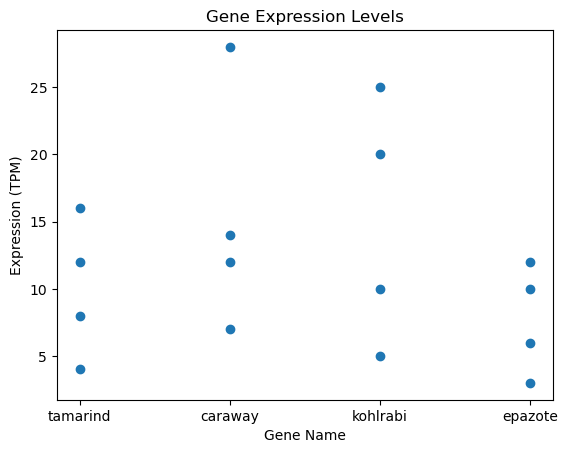

In [344]:
# Plot datapoints
plt.scatter(x=df_tidy['gene_name'], y=df_tidy['expression'] ) # one-liner

# Add labels
plt.title('Gene Expression Levels')
plt.xlabel('Gene Name')
plt.ylabel('Expression (TPM)')

2. For illustration purposes, we show how wide data makes the same task a lot more complicated:

In [347]:
df # wide data

,gene_name,sample1,sample2,sample3,sample4
0,tamarind,12.0,16.0,4.0,8.0
1,caraway,7.0,12.0,14.0,28.0
2,kohlrabi,5.0,25.0,20.0,10.0
3,epazote,10.0,12.0,3.0,6.0


Text(0, 0.5, 'Expression (TPM)')

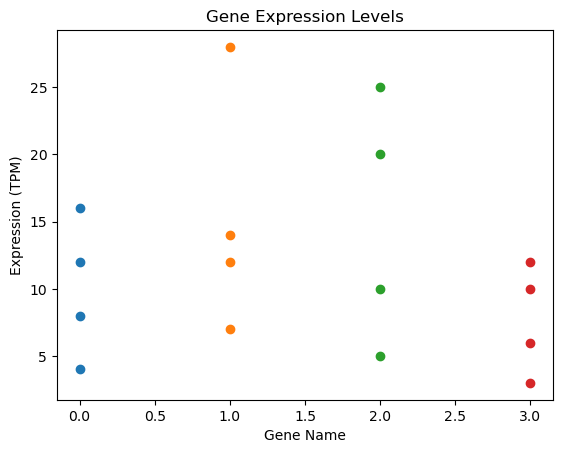

In [364]:
# Plot datapoints
for i in df.axes[0]:                    # loop through rows
    ys = list(df.iloc[i,1:])                 # define y values of points in current row
    xs = [i]*len(ys)   # define x values, i.e. a list repeating the gene name as many times as ys
    plt.scatter(x=xs, y=ys)             # plot current points
    
# Add labels
plt.title('Gene Expression Levels')
plt.xlabel('Gene Name')
plt.ylabel('Expression (TPM)')

3. Finally, Seaborn offers extra functionality and better formatted plots.

Text(46.972222222222214, 0.5, 'Expression (TPM)')

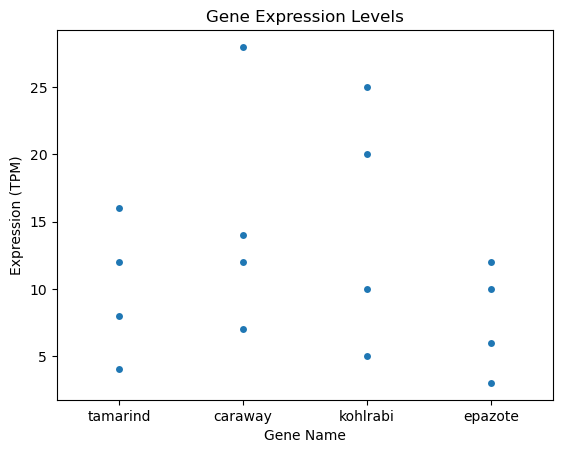

In [352]:
# Plot datapoints
sns.swarmplot(data=df_tidy, x='gene_name', y='expression')

# Add labels
plt.title('Gene Expression Levels')
plt.xlabel('Gene Name')
plt.ylabel('Expression (TPM)')

Seaborn can make several useful and beautiful plots, and it is very easy to use once you have a Pandas DataFrame in tidy format. Have a look at the examples shown at the [Seaborn gallery](https://seaborn.pydata.org/examples/index.html)!